<a href="https://colab.research.google.com/github/Salciano/Python/blob/main/PredictingHouseMarket(WIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analizing the Housing Market

It is possible to make predictious about the housing market. This is not magic, but data-driven analytics knowledge powered by computing and machine learning algorithms.
However, to make credible predictions, we need fact-based data. Then, we can analyze the data to help understand it and what drives the market, before making predictions.
With this said, bear in mind that there are always margins for error.

So, without further ado, let's start by importing the market data, coding libraries and so on that will be required for this...

In [ ]:
#@title Importing Data & Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# The Boston Housing Dataset 2017 derived from information collected by the US Census Service concerning housing in the area of Boston MA. Also available with scikit-learn, using load_boston()
df = pd.read_csv("https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/d4332a3056f44e1a1dec9600a31f21c8_boston.csv", header = 0) # imported on 27.12.2025




In [ ]:
#@title Reproducing the Data
# Let's check if we have our data and can reproduce it

#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', None)

display(df)


,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,Winthrop,1802,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,Winthrop,1803,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,Winthrop,1804,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


#Understading Raw Data

Great, we have our data! All 506 properties!

Now, if it looks incomprehensible. Don't worry. This is a common issue with raw datasets.
Otherwise, if you understood this, great! Just skip over this part.

So, let's try to decypher this mess...

* There are 16 columns and 506 rows in the dataset, totaling 8096 datapoints.
* Each row has an index number, ordered from 0 to 505, that represents one housing property. We can use this to identify each property.
* Each column has a cryptic title that represents a variable or attribute for each housing property, which we will try to explain in simple terms.

1. TOWN: The name of the town where the property is located.
2. TRACT: The ID number of each property. We can also use this to identify each property.
3. LON: The geographical longitude in degrees. Perhaps houses with extreme values near the coast might be more appealing?
4. LAT: The geographical latitude in degrees. Perhaps some houses will be a bit warmer than others, due to being further south. So perhaps latitude could indirectly affect housing prices? We will see...
5. MEDV: The median value of the house; in cases where it is occupied by the owner (owner-occupied); in 1000 USD, so 24.0 means 24000 dollars.
6. CRIM: The crime rate per person (per capita) in each town.
7. ZN: The proportion of residential land (for lots over 25 000 square feet) (constant for all Boston tracts).
8. INDUS: The proportion of non-retail business per town (in acres). 1 acre = 4046.856 square meters.
9. CHAS: Whether the property borders the Charles River. 1 if it does, 0 if it doesn't.
10. NOX: Nitric oxides pollution per town (concentration levels in parts per 10 million).
11. RM: The number of rooms in each dwelling.
12. AGE: Proportion of (owner-occupied) housing units built before 1940.
13. DIS: How far away the property is from five Boston employment centres (weighted distance).
14. RAD: The highway transport infra-structure in each town (in index of accessibility to radial highways per town).
15. TAX: The full-value property-tax rate per town (per 10 000 USD).
16. PTRATIO: The ratio between pupils or students per teacher in each town.

Source: https://search.r-project.org/CRAN/refmans/spData/html/boston.html

Some of these things may not look important, at all. We should analyse them, later, to check if they affect anything and, if they don't, we can exclude that data. This would increase performance and make it easier to understand what really matters...


#Understanding Data: Descriptors
Now that we decyphered what each variable means, we can take a closer look at the data.

Well, you might be thinking that 8096 datapoints is a lot of data to look at, let alone make some sense out of it or even make predictions with it.

If so, you are absolutely right. This is exactly what machines are great at. So, we can let the machine compute this data to analyze and understand it.

For this purpose, we will use an extended data dictionary (EDD).

EDDs are great at summarizing or describing the data, without having to go through thousands or millions of datapoints, individually. This not only helps us to read the data quickly, but also allow us to detect errors and clean the data, early on.

With this in mind, let's summarily examine some of these variables, individually (univariate analysis).

In [ ]:
df.describe()


,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


# Understanding Data: Univariate Analysis
Again, if this looks incomprehensible. Do not worry. I got your back!

First, let's understand in simple terms what we are looking at.

* count: This is the number of times a value was found in the variable.
mean: As the name suggests, this is the average or mean
* std: The standard deviation. Basically, how much does the data distribution deviate from the average. Lower numbers means that the data is cohese, with data distributed close to the average. Higher numbers mean that the data is dispersed, with data distributed far from the average.
* min: This is the minimum value found.
* 25%: The 25th percentile value. 25 percent of the data found is below this value.
* 50%: 50 percent of the data is below this value. This is also the median value, by the way. Since, the median is the value right in the middle of the others.
* 75%: The 75 percentile. 75 percent of the data is below this value.
* max: This is the maximum value found. The max value is also coincides last value in the quarter, by the way.

Other things can be useful for describing or sumarizing data, like median, mode, variance, etc...

Now that things are clearer, we can start analyzing the data with the EDD.

In [ ]:
df.describe()


,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


#Univariate Analysis







##1. TOWN: Town Name
Since there is no numerical data, we will use another method.

Instead we will visually plot how many times each town name appears. So we know where most of the properties are and where the data distribution lies.

<Axes: xlabel='TOWN', ylabel='count'>

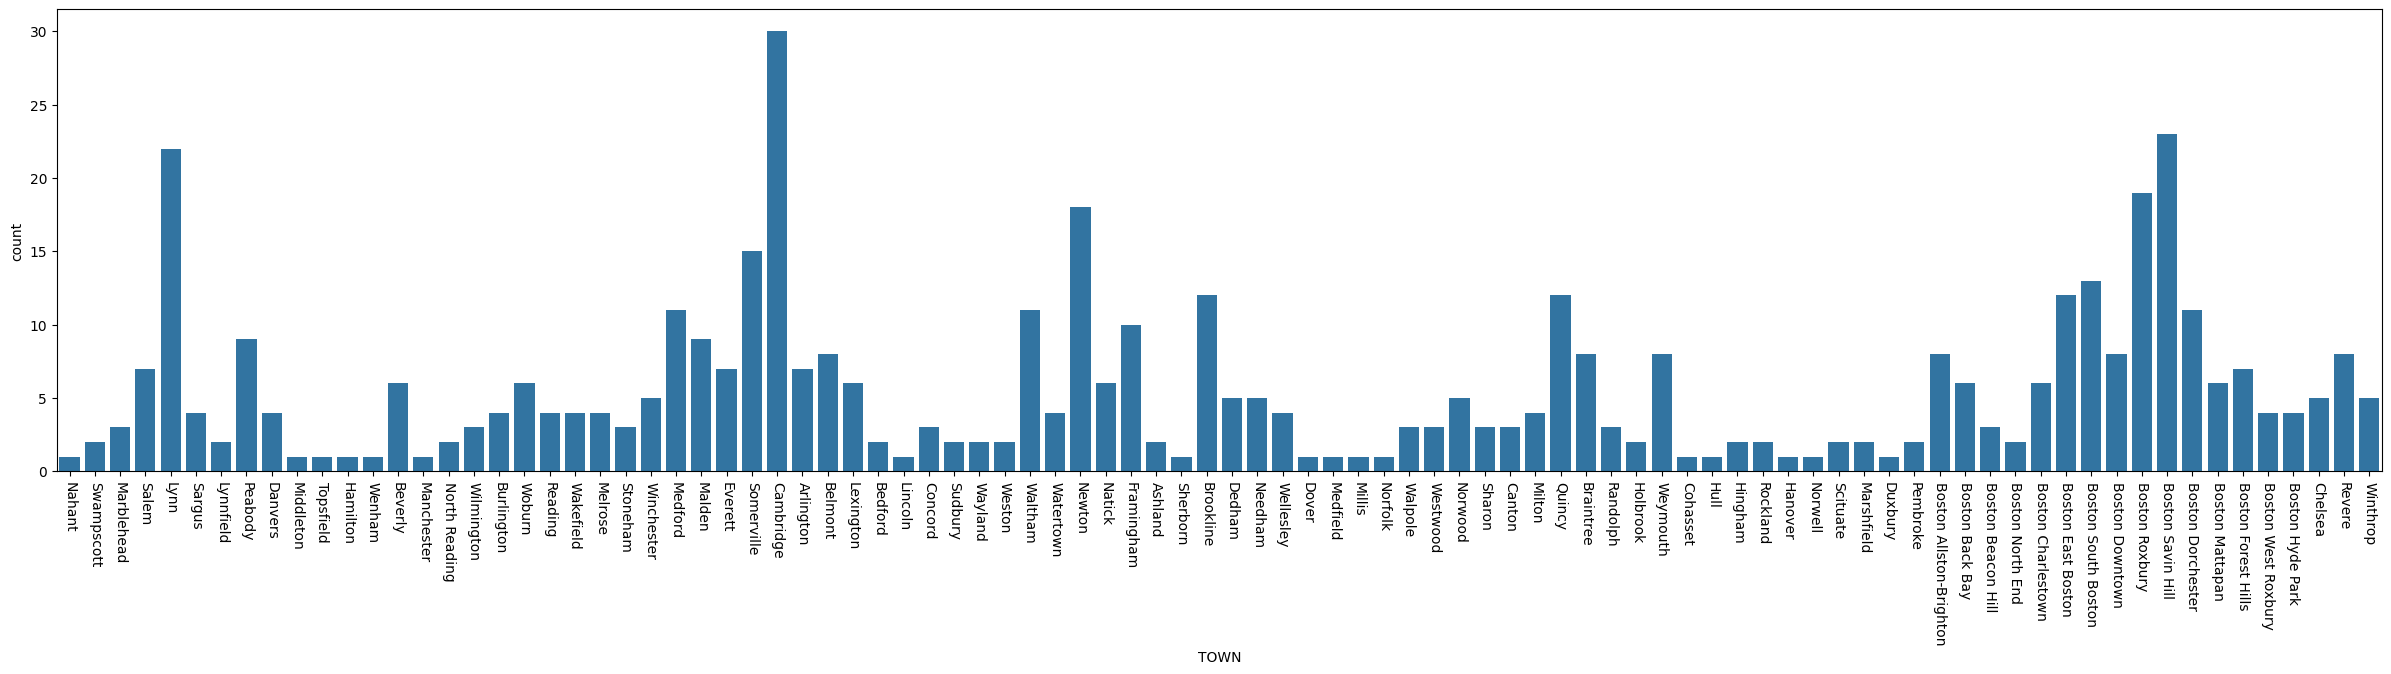

In [ ]:
plt.figure(figsize=(30, 6))
plt.xticks(rotation=270)
sns.countplot(x="TOWN", data=df)


After checking the graph, we can conclude that the geographical data is uneven, with most properties lying in Cambridge, Lynn and Boston Savin Hill.

This may be appropriate, but may also distort the data, especially if it does not represent the actual housing or population data.

Towns with little data may also suffer from poor analytical accuracy...

##2. TRACT: ID Numbers

count: 206. There are 206 values in the TRACT variable. So, 206 IDs.

The average of ID numbers is of no interest to us. So, we will also be skipping such irrelevant variables henceforth.


##3. 4. LON & LAT: Longitude & Latitude
At first sight, there does not seem to be any relevant data, like major discrepancies with the geographical data, unnacounted data or other errors.

##5. MEDV: Median House Value


##6. CRIM: Crime Rate

There is a big discrepancy between the maximum crime rate and the 75% of the data.

75% of the data falls within a crime-rate of 3.677, while the maximum value found was 88.976.

This indicates that, while most of the data is within a small distribution, there may be outliers skewing the data.

There could be many reasons for this. Sometimes there are errors collecting data. Sometimes, there are exceptional events that distort our understanding of the data, in general.

We will have a look at this, later.















##7. ZN: Proportion of Residential Land Zoned

There is significant discrepancy in the zoning ratio distribution.

75% of the data falls within a proportion of 12.50%, while the last 25% reaches %100.

We will have a look at this, later.

##8. INDUS: Proportion of non-retail Business Industry.



##9. CHAS: Bordering Charles River.

We can quicky observe that 75% of the housing properties do not border the river. Possibly more than 75%.




##10. NOX: Nitric Oxides Pollution

##11. RM: The number of rooms in each dwelling.


##12. AGE: Proportion of housing units built before 1940.


##13. DIS: Weighted Distance from Employment Centres


##14. RAD: The highway transport infra-structure in each town (in index of accessibility to radial highways per town).


##15. TAX: Property-tax rate.


##16. PTRATIO: Pupil-Teacher Ratio.

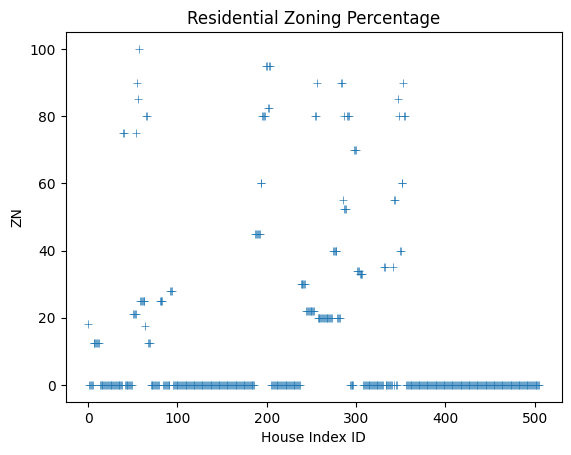

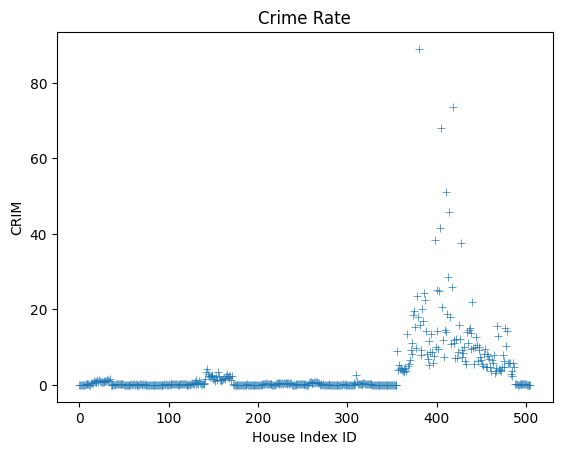

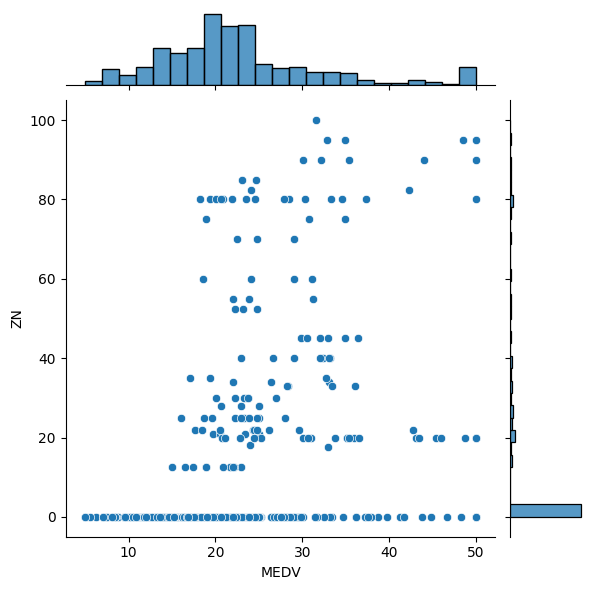

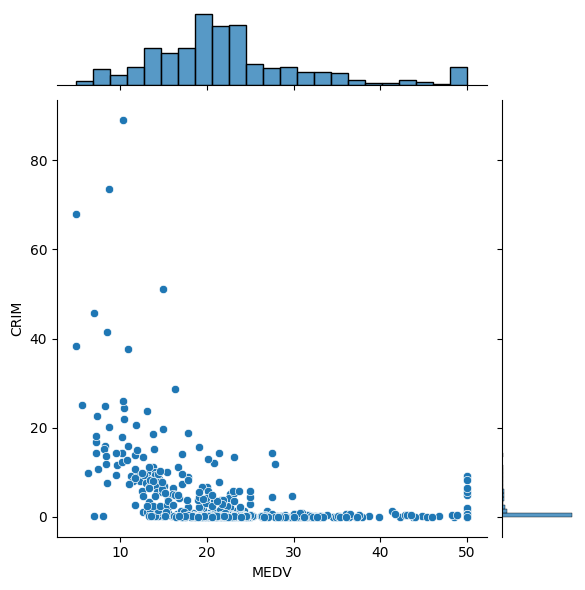

In [ ]:

# Since we identified possible issues with, we will plot this data visually to have a better look.

sns.scatterplot(x=df.index, y="ZN", data=df, marker="+")
plt.xlabel("House Index ID")
plt.title("Residential Zoning Percentage")
plt.show()

sns.scatterplot(x=df.index, y="CRIM", data=df, marker="+")
plt.xlabel("House Index ID")
plt.title("Crime Rate")
plt.show()

# Regarding the crime rate, as suspected, there are a few values that are skewing the data. These few datapoints, are less than 1 percent of the data, yet greatly distort it. Especially the average.

# As for the zoning ratio, it is difficult to believe that all (100%) the land in a town is zoned exclusively for one purpose. Same goes for 0%. This might require investigation or even exclusion from teh dataset.

#sns.jointplot(x="ZN", y="CRIM", data=df)
sns.jointplot(y="ZN", x="MEDV", data=df)
plt.show()

sns.jointplot(y="CRIM", x="MEDV", data=df)
plt.show()




Preliminar Observations

1. Since each variable has 506 values, there seems to be no missing data to worry about.

2. Data skewing or unevenness was observed. Particularly the residential zoning percentages and the outliers found in the crime rate.

...

For computing purposes, like improving prediction accuracy, one of many ways to deal with the crime rate outliers, would be to limit or cap maximum values, such as setting the maximum value at the 99th percentile or 3 times over the 99th percentile. The exact limits are situational, depending on circumstances or context, like the purpose of the limitation, and can appear arbitrary. In any case, we will leave it as it is for now.

There are many other methods, like the sigma approach. Meaning, limiting all values 3 times greater than the standard deviation from the mean.


